# Lab 3
## Miembros del grupo
### Pedro Pablo Arriola Jimenez
### Yongbum Park

In [1]:
%pip install darts

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing

from numpy import mean
from numpy import median

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
/home/unclepete/.local/lib/python3.11/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


### daily-total-female-births.csv

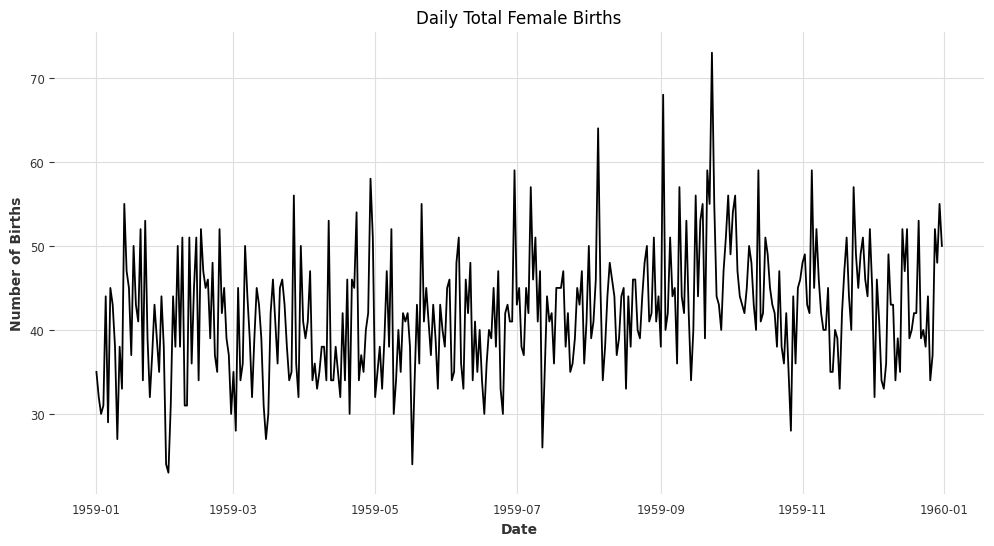

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
births_df = pd.read_csv('daily-total-female-births.csv', parse_dates=[0], index_col=[0])

# Visualizar las primeras filas
births_df.head(), plt.figure(figsize=(12,6))
plt.plot(births_df)
plt.title('Daily Total Female Births')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

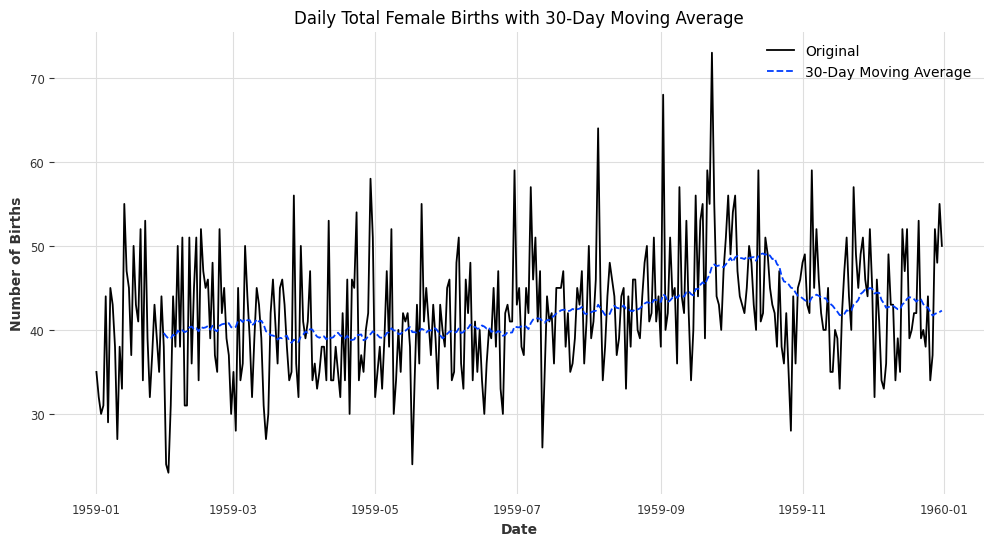

In [4]:
# Calcular el promedio móvil con una ventana de 30 días
births_df['Moving_Avg'] = births_df['Births'].rolling(window=30).mean()

# Visualizar la serie original y el promedio móvil
plt.figure(figsize=(12,6))
plt.plot(births_df['Births'], label='Original')
plt.plot(births_df['Moving_Avg'], label='30-Day Moving Average', linestyle='--')
plt.title('Daily Total Female Births with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba de Dickey-Fuller
result = adfuller(births_df['Births'])

# Mostrar los resultados
adf_statistic, p_value = result[0], result[1]
adf_statistic, p_value

(-4.808291253559765, 5.2434129901498554e-05)

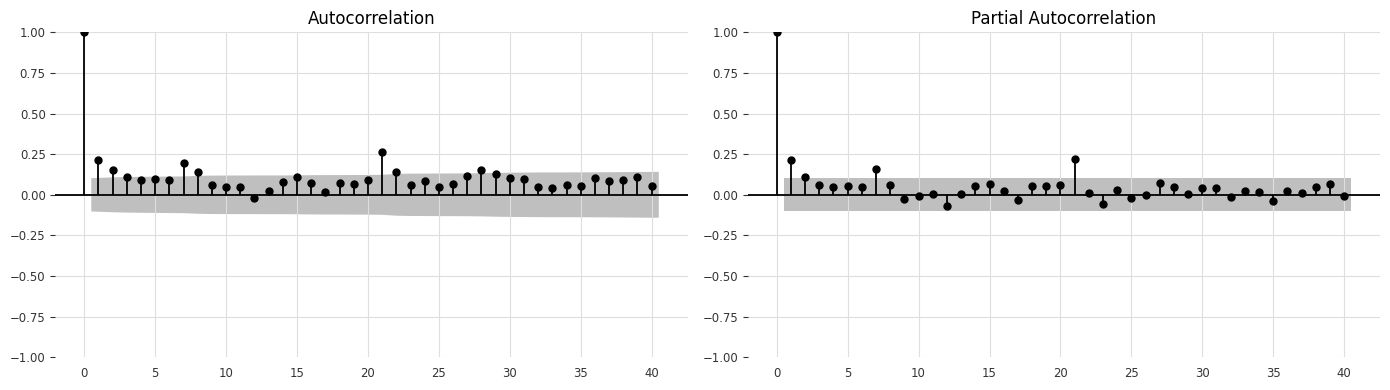

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráficos ACF y PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(births_df['Births'], lags=40, ax=ax[0])
plot_pacf(births_df['Births'], lags=40, ax=ax[1])
plt.tight_layout()
plt.show()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


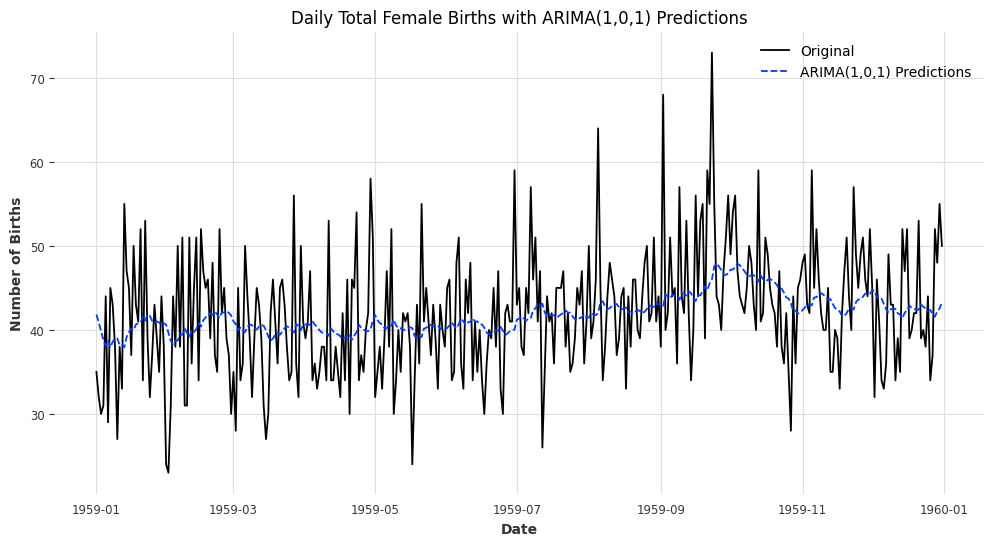

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA(1,0,1)
model_arima = ARIMA(births_df['Births'], order=(1,0,1))
results_arima = model_arima.fit()

# Predicciones
births_df['ARIMA_Pred'] = results_arima.predict(start=0, end=len(births_df)-1)

# Visualizar la serie original y las predicciones de ARIMA
plt.figure(figsize=(12,6))
plt.plot(births_df['Births'], label='Original')
plt.plot(births_df['ARIMA_Pred'], label='ARIMA(1,0,1) Predictions', linestyle='--')
plt.title('Daily Total Female Births with ARIMA(1,0,1) Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


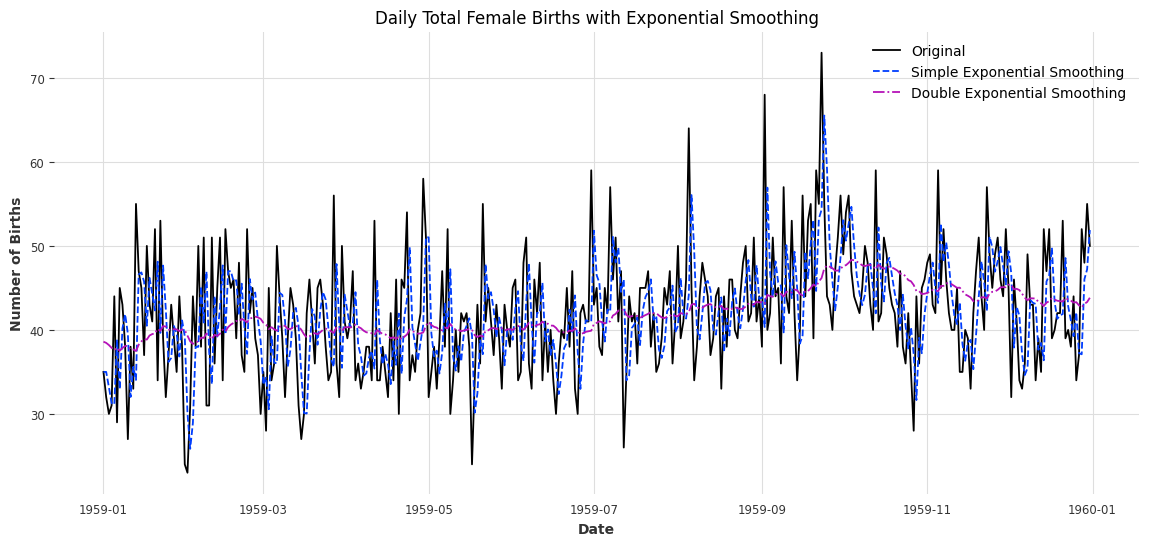

In [8]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Alisamiento Exponencial Simple
model_ses = SimpleExpSmoothing(births_df['Births']).fit(smoothing_level=0.6)
births_df['SES_Pred'] = model_ses.fittedvalues

# Alisamiento Exponencial Doble
model_des = ExponentialSmoothing(births_df['Births'], trend='add').fit()
births_df['DES_Pred'] = model_des.fittedvalues

# Visualizar la serie original, predicciones de SES y DES
plt.figure(figsize=(14,6))
plt.plot(births_df['Births'], label='Original')
plt.plot(births_df['SES_Pred'], label='Simple Exponential Smoothing', linestyle='--')
plt.plot(births_df['DES_Pred'], label='Double Exponential Smoothing', linestyle='-.')
plt.title('Daily Total Female Births with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
%pip install prophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


In [1]:
from prophet import Prophet

# Preparar los datos para Prophet
prophet_df = births_df.reset_index()[['Date', 'Births']]
prophet_df.columns = ['ds', 'y']

# Ajustar el modelo Prophet
model_prophet = Prophet(yearly_seasonality=False, daily_seasonality=False)
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(prophet_df)

# Hacer predicciones
future = model_prophet.make_future_dataframe(periods=0)
forecast = model_prophet.predict(future)

# Visualizar las predicciones
plt.figure(figsize=(14,6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Original')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Predictions', linestyle='--')
plt.title('Daily Total Female Births with Prophet Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'prophet'

In [14]:
import pandas as pd
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

# Carga el dataset
births_df = pd.read_csv('daily-total-female-births.csv', parse_dates=['Date'], index_col='Date')

time_steps = 30

# Train/test split
train_size = int(len(births_df) * 0.8)
test_size = len(births_df) - train_size
train, test = births_df.iloc[0:train_size], births_df.iloc[train_size:len(births_df)]

X_train, y_train = create_dataset(train['Births'], train['Births'], time_steps)
X_test, y_test = create_dataset(test['Births'], test['Births'], time_steps)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construcción del modelo
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=time_steps))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/50
15/15 [==============================] - 1s 46ms/step - loss: 1596.7137 - val_loss: 78.4696
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 180.0054 - val_loss: 138.0577
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 80.7585 - val_loss: 85.6137
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 58.3377 - val_loss: 89.7565
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 58.5964 - val_loss: 72.8980
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 54.9732 - val_loss: 76.4367
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 55.4640 - val_loss: 74.0825
Epoch 8/50
15/15 [==============================] - 0s 6ms/step - loss: 54.6023 - val_loss: 74.3614
Epoch 9/50
15/15 [==============================] - 0s 6ms/step - loss: 54.4934 - val_loss: 73.5346
Epoch 10/50
15/15 [==============================] - 0s 5ms/step - loss: 54.1659 - val_loss: 73

In [16]:
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}")

2/2 [==============================] - 0s 6ms/step - loss: 50.1967
Test Loss: 50.1967


2/2 [==============================] - 0s 2ms/step


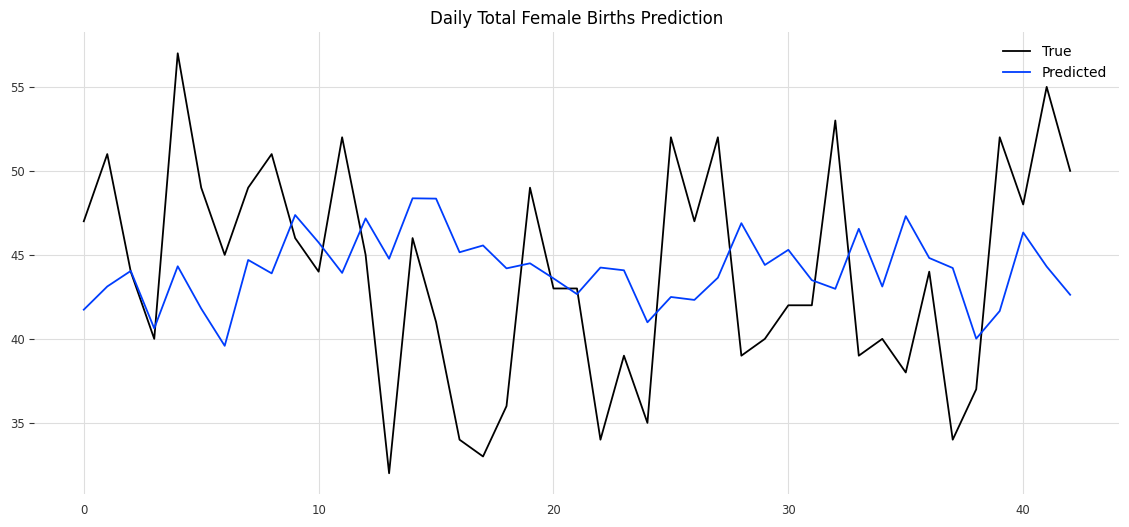

In [17]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(14,6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('Daily Total Female Births Prediction')
plt.legend()
plt.show()

### monthly-car-sales.csv

(            Sales
 Month            
 1960-01-01   6550
 1960-02-01   8728
 1960-03-01  12026
 1960-04-01  14395
 1960-05-01  14587,
 <Axes: title={'center': 'Monthly Car Sales'}, xlabel='Month'>)

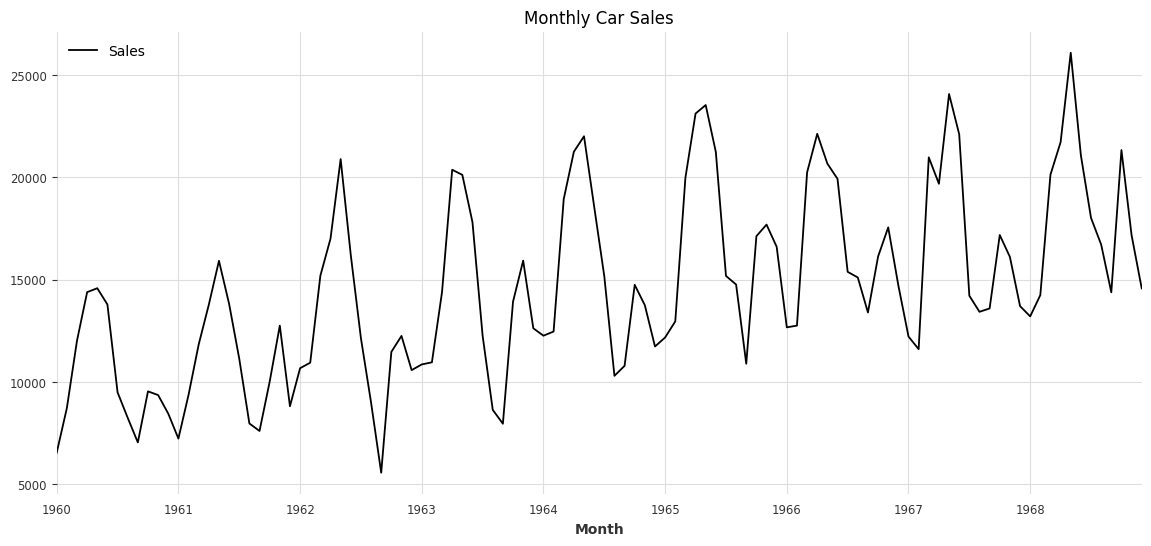

In [18]:
# Cargar el conjunto de datos
car_sales_df = pd.read_csv('monthly-car-sales.csv', parse_dates=['Month'], index_col='Month')

# Mostrar las primeras filas del conjunto de datos
car_sales_df.head(), car_sales_df.plot(figsize=(14, 6), title="Monthly Car Sales")

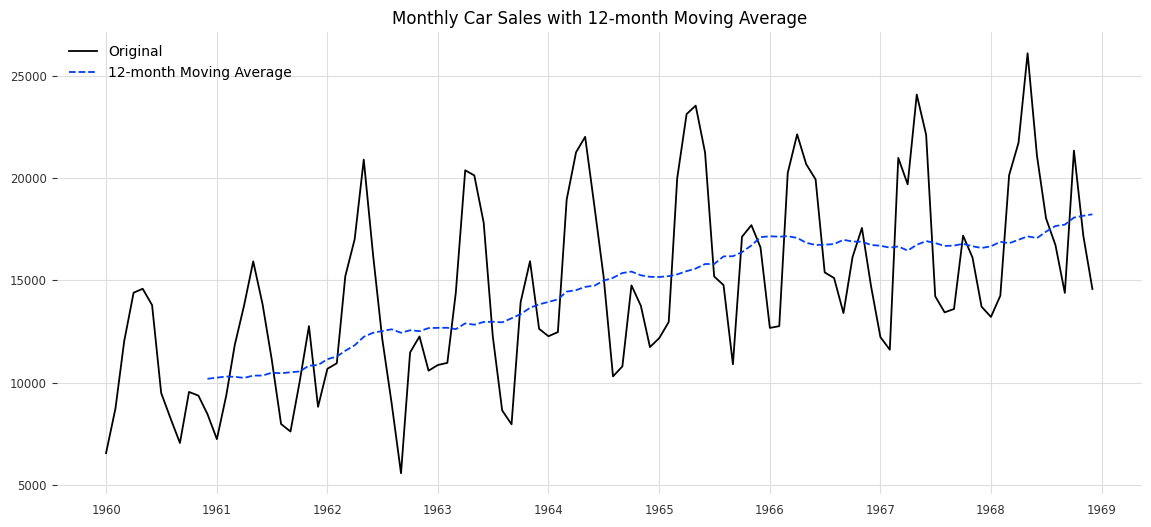

In [19]:
# Calcular el promedio móvil de 12 meses
car_sales_df['12_month_MA'] = car_sales_df['Sales'].rolling(window=12).mean()

# Visualizar la serie de tiempo original y el promedio móvil
plt.figure(figsize=(14, 6))
plt.plot(car_sales_df['Sales'], label='Original')
plt.plot(car_sales_df['12_month_MA'], label='12-month Moving Average', linestyle='--')
plt.title('Monthly Car Sales with 12-month Moving Average')
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product

# Define the p, d, q and seasonal p, d, q parameters
p = d = q = range(0, 2)  # Take values 0 or 1
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Use 12 for monthly data

# Find the best parameters with the lowest AIC
lowest_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(car_sales_df['Sales'], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit()
            
            if results.aic < lowest_aic:
                lowest_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                
        except:
            continue

best_pdq, best_seasonal_pdq, lowest_aic

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09543D+01    |proj g|=  4.94715D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.947D-07   1.095D+01
  F =   10.954304514104948     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.5

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41950D+00    |proj g|=  7.28012D+00

At iterate    5    f=  7.94133D+00    |proj g|=  2.75767D+00

At iterate   10    f=  7.85345D+00    |proj g|=  6.50829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   1.667D-04   7.853D+00
  F =   7.8534533176091639     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.37424D+00    |proj g|=  6.41766D-01

At iterate    5    f=  9.23183D+00    |proj g|=  1.68794D-03

At iterate   10    f=  9.23026D+00    |proj g|=  4.96943D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     19      1     0     0   4.969D-05   9.230D+00
  F =   9.2302553149075219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa


At iterate    5    f=  6.83613D+00    |proj g|=  1.48226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.054D-05   6.836D+00
  F =   6.8361270394646647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.54109D+00    |proj g|=  6.50774D-01

At iterate    5    f=  9.36782D+00    |proj g|=  1.27205D-03

At iterate   10    f=  9.36781D+00    |proj g|=  1.79575D-04

At iter

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  9.17239D+00    |proj g|=  1.40240D-02

At iterate   25    f=  9.14788D+00    |proj g|=  7.56075D-02

At iterate   30    f=  8.94161D+00    |proj g|=  5.02828D-01

At iterate   35    f=  8.29630D+00    |proj g|=  2.25096D+00

At iterate   40    f=  7.79842D+00    |proj g|=  1.56179D+00

At iterate   45    f=  7.75182D+00    |proj g|=  3.30995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     75      1     0     0   1.799D-05   7.752D+00
  F =   7.7518146229507501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09773D+00    |proj g|=  1.84135D+00

At iterate    5    f=  6.83937D+00    |proj g|=  5.36251D-03

At iterate   10    f=  6.80099D+00    |proj g|=  2.11887D-01

At iterate   15    f=  6.79355D+00    |proj g|=  2.99677D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     26      1     0     0   8.447D-05   6.794D+00
  F =   6.7935484100618524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa


At iterate   10    f=  8.15951D+00    |proj g|=  3.54264D-03

At iterate   15    f=  8.15836D+00    |proj g|=  4.42033D-02

At iterate   20    f=  8.09493D+00    |proj g|=  1.51097D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     26      1     0     0   8.514D-07   8.087D+00
  F =   8.0866080811338765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.94668D+00    |proj g|=  6.25258D-05

       

 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99321D+00    |proj g|=  1.01497D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   1.015D-05   7.993D+00
  F =   7.9932064846237827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.9

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.86662D+00    |proj g|=  5.16766D-02

At iterate    5    f=  6.85613D+00    |proj g|=  1.46324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   4.359D-05   6.856D+00
  F =   6.8561320721312153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-p


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   9.990D-05   8.042D+00
  F =   8.0423566676825384     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67229D+00    |proj g|=  3.88419D-02

At iterate    5    f=  7.67138D+00    |proj g|=  8.31198D-04

At iterate   10    f=  7.67120D+00    |proj g|=  1.50131D-02

At iterate   15    f=  7.67040D+00    |proj g|=  2.69073D-05

       

 This problem is unconstrained.



At iterate   10    f=  6.63393D+00    |proj g|=  3.32000D-03

At iterate   15    f=  6.63248D+00    |proj g|=  3.80420D-02

At iterate   20    f=  6.62452D+00    |proj g|=  3.19075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.826D-07   6.625D+00
  F =   6.6245101921668201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.14582D+00    |proj g|=  2.33940D-01

At iterate    5    f=  8.06981D+00    |proj g|=  1.88428D-04

At iterate   10    f=  8.06978D+00    |proj g|=  3.27325D-03

At iterate   15    f=  8.06661D+00    |proj g|=  3.85409D-02

At iterate   20    f=  7.97255D+00    |proj g|=  4.90961D-02

At iterate   25    f=  7.82939D+00    |proj g|=  1.68171D-02

At iterate   30    f=  7.82930D+00    |proj g|=  5.69766D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  7.89319D+00    |proj g|=  1.28919D-01

At iterate   10    f=  7.88241D+00    |proj g|=  1.14038D-03

At iterate   15    f=  7.88241D+00    |proj g|=  2.29967D-03

At iterate   20    f=  7.88219D+00    |proj g|=  2.95291D-02

At iterate   25    f=  7.85989D+00    |proj g|=  2.05459D-01

At iterate   30    f=  7.62601D+00    |proj g|=  3.46717D-01

At iterate   35    f=  7.59398D+00    |proj g|=  6.50070D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     46      1     0     0   3.693D-06   7.594D+00
  F =   7.5939733242734997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.63369D+00    |proj g|=  5.92581D-03

At iterate   15    f=  6.63366D+00    |proj g|=  1.00036D-04

At iterate   20    f=  6.63345D+00    |proj g|=  2.61818D-03

At iterate   25    f=  6.62696D+00    |proj g|=  3.30104D-02

At iterate   30    f=  6.62027D+00    |proj g|=  1.37984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     48      1     0     0   5.633D-07   6.620D+00
  F =   6.6202558287898023     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22363D+00    |proj g|=  1.50291D-01

At iterate    5    f=  8.20709D+00    |proj g|=  1.03168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.032D-04   8.207D+00
  F =   8.2070855260797018     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09607D+00    |proj g|=  1.60323D-01

At iterate    5    f=  8.05891D+00    |proj g|=  1.42048D-02

At iterate   10    f=  8.05854D+00    |proj g|=  1.91839D-04

At iterate   15    f=  8.05853D+00    |proj g|=  4.81138D-03

At iterate   20    f=  8.05766D+00    |proj g|=  6.17353D-02

At iterate   25    f=  8.01910D+00    |proj g|=  7.66941D-01

At iterate   30    f=  7.82664D+00    |proj g|=  9.28215D-02

At iterate   35    f=  7.81199D+00    |proj g|=  1.54898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.85208D+00    |proj g|=  9.11575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   2.413D-05   6.852D+00
  F =   6.8519466116810595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33055D+00    |proj g|=  1.67236D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  8.10521D+00    |proj g|=  2.45748D-01

At iterate   25    f=  8.07399D+00    |proj g|=  2.00812D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   4.100D-05   8.074D+00
  F =   8.0737961123151010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75029D+00    |proj g|=  1.12404D-01

At iterate    5    f=  7.74232D+00    |proj g|=  2.93060D-03

       

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.70682D+00    |proj g|=  9.62957D-02

At iterate   10    f=  6.70532D+00    |proj g|=  1.33172D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   7.109D-05   6.705D+00
  F =   6.7053183442137234     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18556D+00    |proj g|=  3.77215D-01

At iterate    5    f=  8.05085D+00    |proj g|=  2.96885D-02

At iter

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  8.05065D+00    |proj g|=  8.14842D-03

At iterate   20    f=  8.04036D+00    |proj g|=  8.55762D-02

At iterate   25    f=  7.84585D+00    |proj g|=  1.96360D-01

At iterate   30    f=  7.82421D+00    |proj g|=  1.80517D-01

At iterate   35    f=  7.81791D+00    |proj g|=  3.87689D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     48      1     0     0   1.732D-05   7.818D+00
  F =   7.8179102850451123     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03356D+00    |proj g|=  2.01753D-01

At iterate    5    f=  7.95794D+00    |proj g|=  6.76894D-02

At iterate   10    f=  7.95248D+00    |proj g|=  7.94169D-02

At iterate   15    f=  7.94960D+00    |proj g|=  5.42399D-04

At iterate   20    f=  7.94960D+00    |proj g|=  1.19640D-03

At iterate   25    f=  7.94948D+00    |proj g|=  1.84495D-02

At iterate   30    f=  7.94310D+00    |proj g|=  9.47658D-02

At iterate   35    f=  7.70109D+00    |proj g|=  6.30503D-01

At iterate   40    f=  7.66288D+00    |proj g|=  1.60270D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     10      1     0     0   6.911D-05   6.784D+00
  F =   6.7835230781106315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.72758D+00    |proj g|=  5.63822D-01


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.70877D+00    |proj g|=  8.30340D-02

At iterate   10    f=  6.70531D+00    |proj g|=  2.37323D-02

At iterate   15    f=  6.69925D+00    |proj g|=  1.26033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   7.224D-05   6.699D+00
  F =   6.6992509755303251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.33868D+00    |proj g|=  5.02300D-06

       

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  8.12115D+00    |proj g|=  2.65187D-03

At iterate   15    f=  8.11988D+00    |proj g|=  3.33244D-02

At iterate   20    f=  8.08275D+00    |proj g|=  7.88353D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   5.473D-06   8.078D+00
  F =   8.0783990713015719     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.79270D+00    |proj g|=  6.13651D-06

       

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78117D+00    |proj g|=  9.07914D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   3.313D-05   6.774D+00
  F =   6.7740941780984221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.0

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.98142D+00    |proj g|=  4.87665D-02

At iterate   20    f=  7.81768D+00    |proj g|=  2.71510D-01

At iterate   25    f=  7.78290D+00    |proj g|=  7.22210D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     31      1     0     0   1.552D-06   7.783D+00
  F =   7.7828890021747279     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09587D+00    |proj g|=  7.05988D-01


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.98035D+00    |proj g|=  1.12405D-01

At iterate   10    f=  7.97555D+00    |proj g|=  2.47924D-04

At iterate   15    f=  7.97555D+00    |proj g|=  1.52495D-03

At iterate   20    f=  7.97488D+00    |proj g|=  1.99892D-02

At iterate   25    f=  7.93218D+00    |proj g|=  4.05860D-01

At iterate   30    f=  7.74837D+00    |proj g|=  3.58403D-02

At iterate   35    f=  7.74781D+00    |proj g|=  4.81810D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     38      1     0     0   4.818D-06   7.748D+00
  F =   7.7478107421525388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78319D+00    |proj g|=  8.23706D-02

At iterate    5    f=  6.77480D+00    |proj g|=  1.70665D-02

At iterate   10    f=  6.77406D+00    |proj g|=  3.25864D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   3.523D-05   6.774D+00
  F =   6.7740550059020164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.99332D+00    |proj g|=  1.09195D-02

At iterate   10    f=  7.99318D+00    |proj g|=  1.64653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   1.647D-04   7.993D+00
  F =   7.9931830026461945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.67627D+00    |proj g|=  5.43594D-02


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.67086D+00    |proj g|=  8.04457D-04
  ys=-1.592E-04  -gs= 1.788E-05 BFGS update SKIPPED

At iterate   10    f=  7.67020D+00    |proj g|=  3.11796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     23      1     1     0   3.260D-05   7.670D+00
  F =   7.6701997508899451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.65671D+00    |proj g|=  6.05549D-02


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.62372D+00    |proj g|=  1.91594D-02

At iterate   10    f=  6.62338D+00    |proj g|=  1.12747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     16      1     0     0   1.127D-04   6.623D+00
  F =   6.6233841394806197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05601D+00    |proj g|=  2.21310D-01


/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.96747D+00    |proj g|=  1.63608D-02

At iterate   10    f=  7.96695D+00    |proj g|=  9.11685D-04

At iterate   15    f=  7.96676D+00    |proj g|=  1.53866D-02

At iterate   20    f=  7.94913D+00    |proj g|=  2.07332D-01

At iterate   25    f=  7.83901D+00    |proj g|=  2.24106D-01

At iterate   30    f=  7.74450D+00    |proj g|=  1.23756D-01

At iterate   35    f=  7.72044D+00    |proj g|=  1.12231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     52      1     0     0   9.324D-06   7.720D+00
  F =   7.7204395224561946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.87221D+00    |proj g|=  9.56319D-02

At iterate   10    f=  7.86687D+00    |proj g|=  3.78254D-03

At iterate   15    f=  7.86685D+00    |proj g|=  6.41478D-04

At iterate   20    f=  7.86676D+00    |proj g|=  8.73228D-03

At iterate   25    f=  7.85338D+00    |proj g|=  1.49451D-01

At iterate   30    f=  7.63206D+00    |proj g|=  2.82136D-01

At iterate   35    f=  7.58426D+00    |proj g|=  3.12267D-02

At iterate   40    f=  7.58413D+00    |proj g|=  9.47180D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     46      1     0     0   9.472D-06   7.584D+00
  F =   7.58412798782

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73346D+00    |proj g|=  6.17088D-02

At iterate    5    f=  6.71259D+00    |proj g|=  8.28653D-04

At iterate   10    f=  6.71259D+00    |proj g|=  1.48721D-03

At iterate   15    f=  6.71210D+00    |proj g|=  1.97017D-02

At iterate   20    f=  6.70620D+00    |proj g|=  8.38723D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     29      1     0     0   1.490D-07   6.706D+00
  F =   6.7061588887732446     

CONVERG

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.62903D+00    |proj g|=  2.20965D-02

At iterate   10    f=  6.62300D+00    |proj g|=  1.27592D-02

At iterate   15    f=  6.62292D+00    |proj g|=  1.96537D-04

At iterate   20    f=  6.62291D+00    |proj g|=  6.86378D-03

At iterate   25    f=  6.62160D+00    |proj g|=  5.69141D-02

At iterate   30    f=  6.61308D+00    |proj g|=  5.11295D-02

At iterate   35    f=  6.61082D+00    |proj g|=  3.01406D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   1.913D-05   6.611D+00
  F =   6.6108151425955146     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

((0, 1, 1), (0, 1, 1, 12), 1436.8942015080331)

In [21]:
# Ajustar el modelo SARIMA con los parámetros óptimos
sarima_model = SARIMAX(car_sales_df['Sales'], order=best_pdq, seasonal_order=best_seasonal_pdq, enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Resumen del modelo
sarima_results.summary()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.63948D+00    |proj g|=  6.40451D-02

At iterate    5    f=  6.63395D+00    |proj g|=  8.33682D-05

At iterate   10    f=  6.63393D+00    |proj g|=  3.32000D-03

At iterate   15    f=  6.63248D+00    |proj g|=  3.80420D-02

At iterate   20    f=  6.62452D+00    |proj g|=  3.19075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   1.826D-07   6.625D+00
  F =   6.6245101921668201     

CONVERG

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -715.447
Date:                            Sat, 02 Sep 2023   AIC                           1436.894
Time:                                    20:53:06   BIC                           1444.078
Sample:                                01-01-1960   HQIC                          1439.776
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8372      0.066    -12.691      0.000      -0.967      -0.708
ma.S.L12      -0.4687      0.114     -4.108      0.000      -0.692      -0.245
sigma2      2.673e+06    4.8e+05      5.573      0.000    1.73e+06    3.61e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.40   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.24   Prob(JB):                         0.79
Heteroskedasticity (H):               0.99   Skew:                             0.03
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

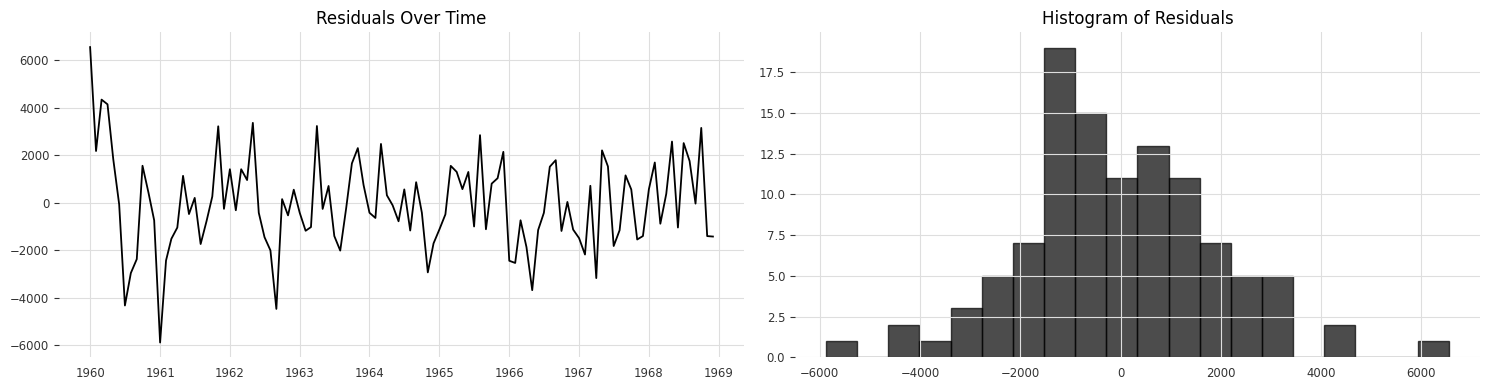

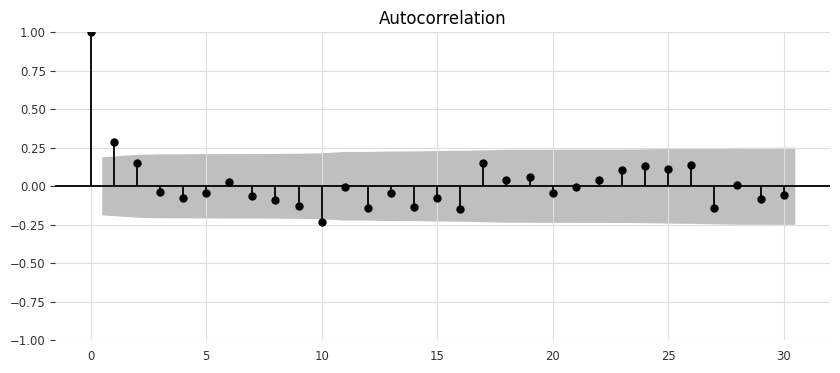

In [22]:
# Visualizar los residuales
residuals = sarima_results.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Residual plot
ax[0].plot(residuals)
ax[0].set_title('Residuals Over Time')

# Histogram of residuals
ax[1].hist(residuals, bins=20, edgecolor='k', alpha=0.7)
ax[1].set_title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# ACF plot of residuals
fig, ax = plt.subplots(figsize=(10, 4))
plot_acf(residuals, ax=ax, lags=30)
plt.show()

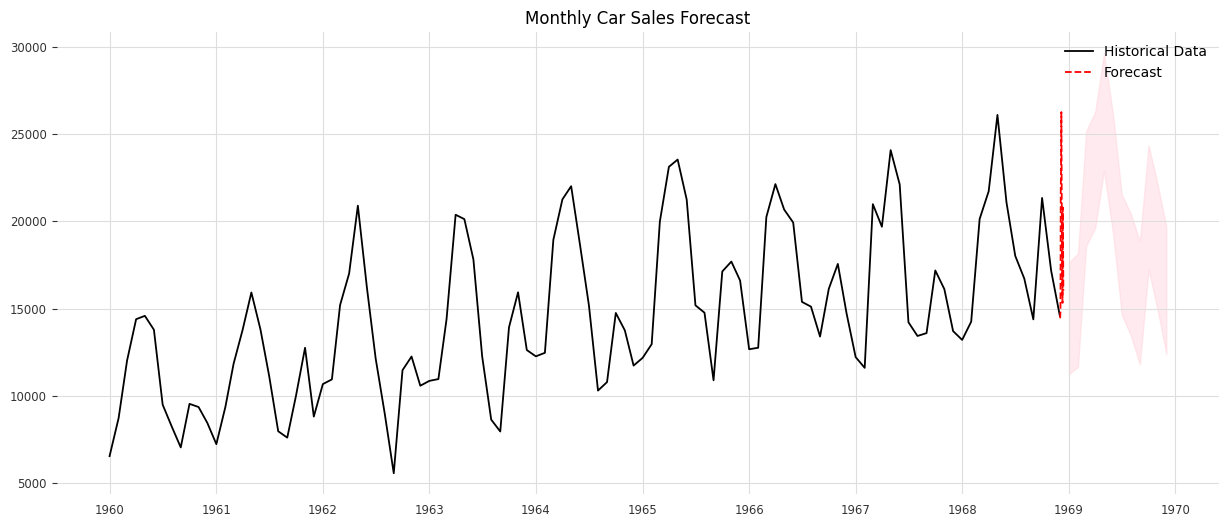

In [25]:
# Recalculando los intervalos de confianza para la previsión
confidence_intervals = forecast.conf_int(alpha=0.05)

# Visualizar las previsiones nuevamente
plt.figure(figsize=(15, 6))
plt.plot(car_sales_df['Sales'], label='Historical Data')
plt.plot(forecast_series, color='red', label='Forecast', linestyle='--')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Car Sales Forecast')
plt.legend()
plt.show()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


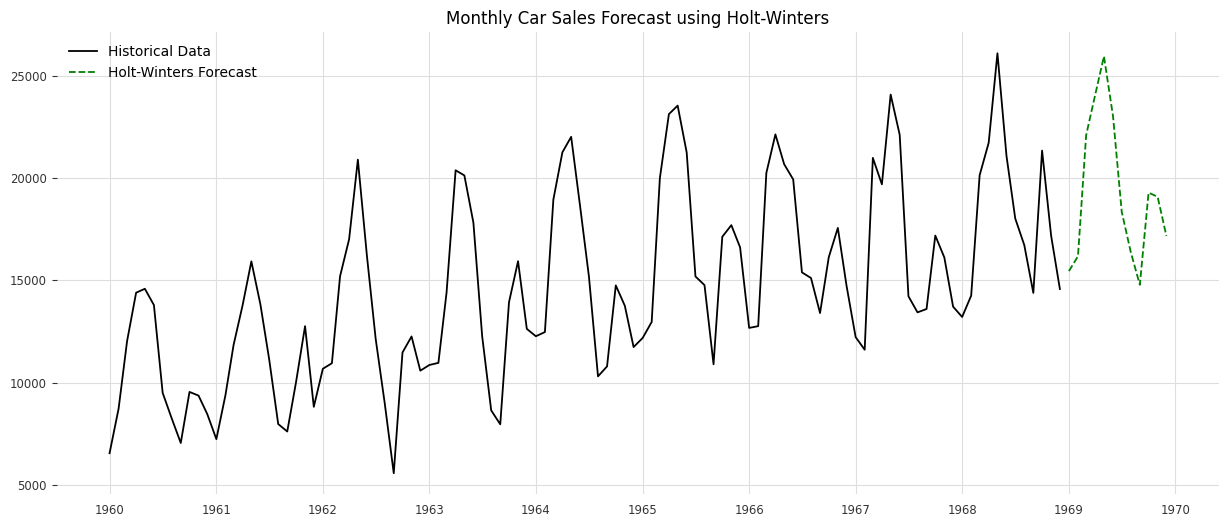

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Entrenamiento del modelo de alisamiento exponencial con tendencia y estacionalidad (Holt-Winters)
model_hw = ExponentialSmoothing(car_sales_df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit()

# Previsión para los próximos 12 meses
forecast_hw = fit_hw.forecast(steps=forecast_steps)

# Visualización de las previsiones
plt.figure(figsize=(15, 6))
plt.plot(car_sales_df['Sales'], label='Historical Data')
plt.plot(forecast_hw, color='green', label='Holt-Winters Forecast', linestyle='--')
plt.title('Monthly Car Sales Forecast using Holt-Winters')
plt.legend()
plt.show()

In [29]:
# Preparando el dataframe para Prophet
prophet_df = car_sales_df.reset_index()[['Month', 'Sales']]
prophet_df.columns = ['ds', 'y']

prophet_df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


21:01:52 - cmdstanpy - INFO - Chain [1] start processing
21:01:52 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1500x600 with 0 Axes>

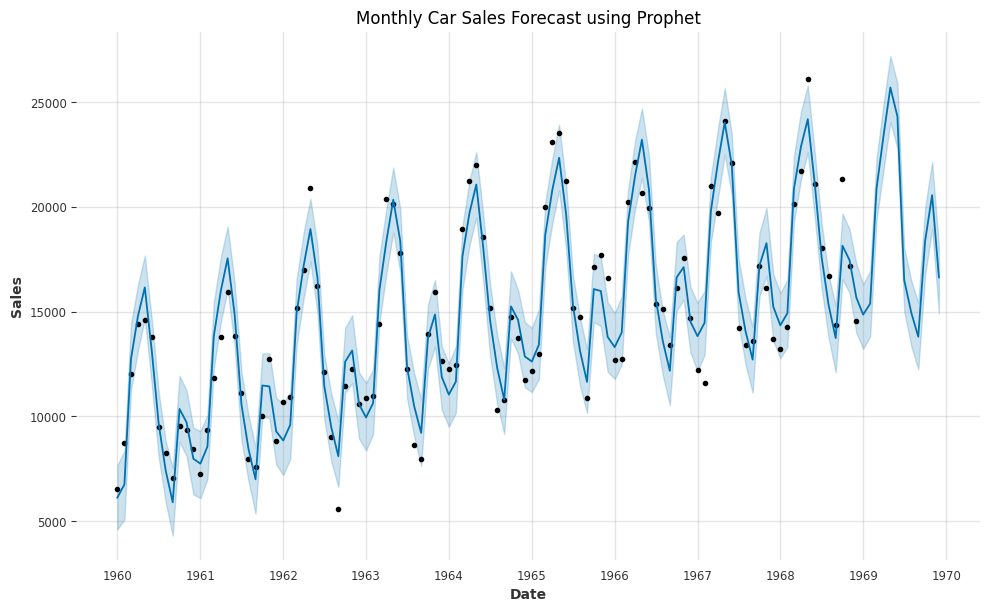

In [30]:
# Creación y entrenamiento del modelo
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_df)

# Realizando predicciones para el próximo año
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

# Visualización de las predicciones
plt.figure(figsize=(15, 6))
prophet_model.plot(forecast, xlabel='Date', ylabel='Sales')
plt.title('Monthly Car Sales Forecast using Prophet')
plt.show()


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Escalando los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(car_sales_df[['Sales']].values)

# Función para convertir la serie temporal en un problema de aprendizaje supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Crear entradas (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Crear salidas (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Concatenar todo
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Eliminar filas con valores NaN
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Transformar la serie temporal en un problema de aprendizaje supervisado
reframed = series_to_supervised(scaled_data, 1, 1)

# Separar en conjuntos de entrenamiento y prueba
train_size = int(len(reframed) * 0.8)
train, test = reframed.values[:train_size, :], reframed.values[train_size:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((85, 1), (85,), (22, 1), (22,))

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Construcción del modelo
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=train_X.shape[1], activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo
history = nn_model.fit(train_X, train_y, epochs=100, batch_size=2, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# Evaluación del modelo
train_loss = nn_model.evaluate(train_X, train_y, verbose=0)
test_loss = nn_model.evaluate(test_X, test_y, verbose=0)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


Epoch 1/100
43/43 [==============================] - 1s 7ms/step - loss: 0.3078 - val_loss: 0.4842
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1741 - val_loss: 0.3130
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1105 - val_loss: 0.2175
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0764 - val_loss: 0.1590
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.1209
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0441 - val_loss: 0.0953
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.0370 - val_loss: 0.0782
Epoch 8/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0330 - val_loss: 0.0665
Epoch 9/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.0590
Epoch 10/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.0541
Epoch 11/

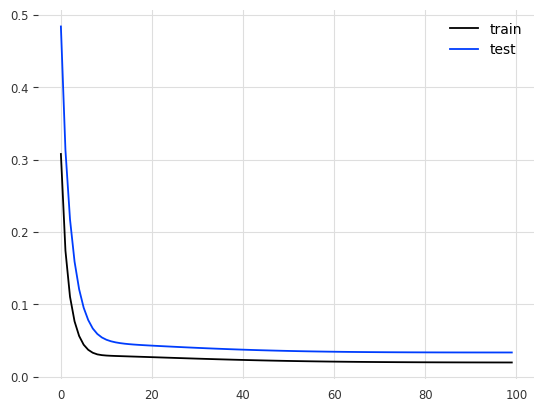

In [34]:
# Visualización del entrenamiento
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### monthly-mean-temp.csv

In [37]:
# Cargando el conjunto de datos
temp_df = pd.read_csv('monthly-mean-temp.csv', parse_dates=['Month'], index_col='Month')

# Mostrando las primeras entradas
temp_df.head()

,Temperature
Month,
1920-01-01,40.6
1920-02-01,40.8
1920-03-01,44.4
1920-04-01,46.7
1920-05-01,54.1


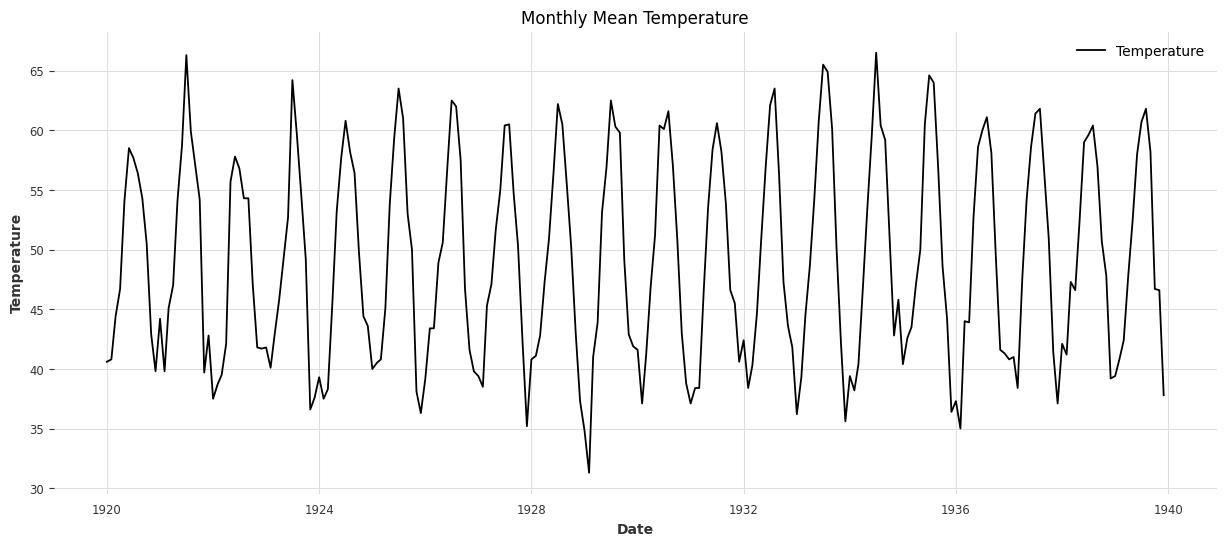

In [38]:
# Visualizando el conjunto de datos
plt.figure(figsize=(15, 6))
plt.plot(temp_df['Temperature'], label='Temperature')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

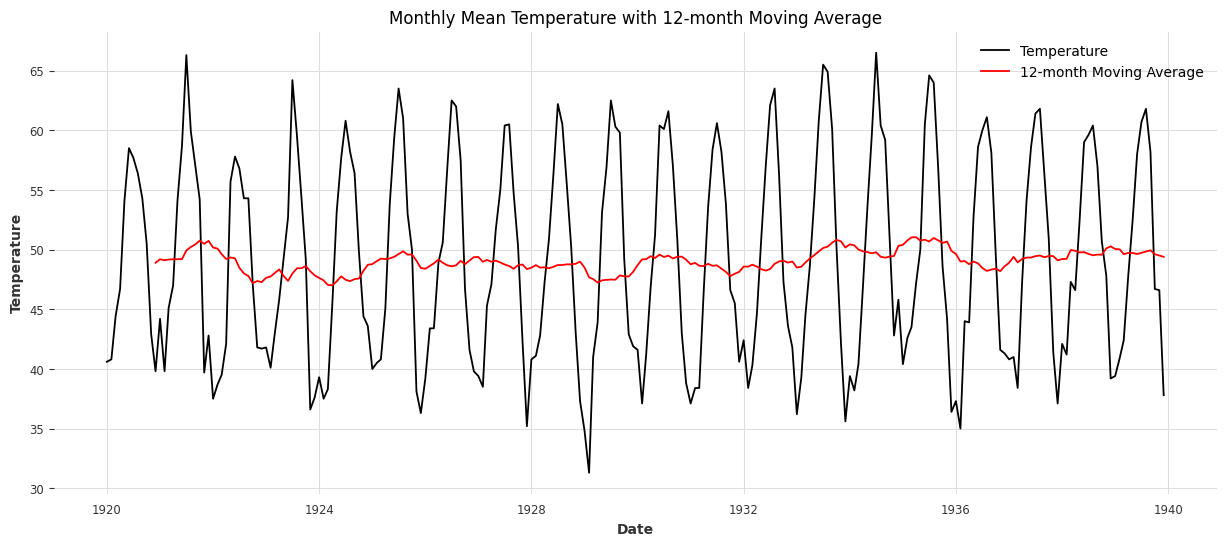

In [39]:
# Calculando el promedio móvil de 12 meses
temp_df['12_month_MA'] = temp_df['Temperature'].rolling(window=12).mean()

# Visualizando la serie temporal junto con el promedio móvil
plt.figure(figsize=(15, 6))
plt.plot(temp_df['Temperature'], label='Temperature')
plt.plot(temp_df['12_month_MA'], color='red', label='12-month Moving Average')
plt.title('Monthly Mean Temperature with 12-month Moving Average')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

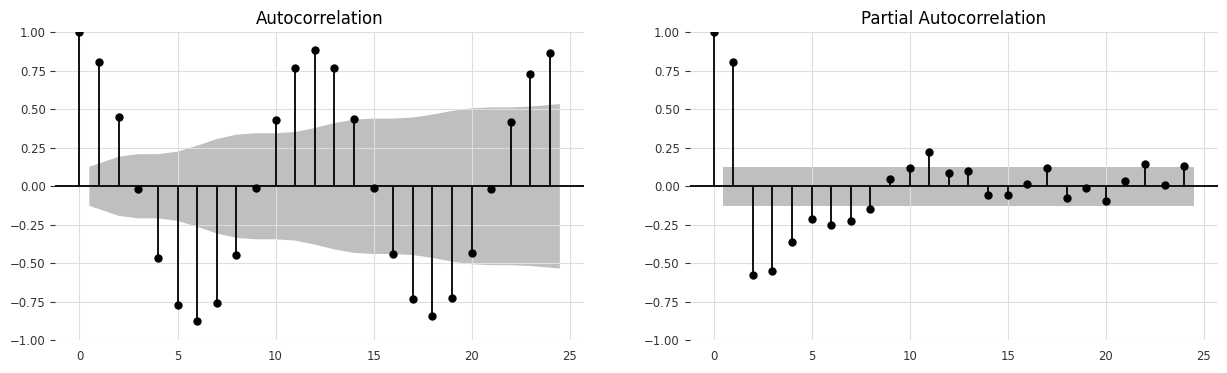

In [40]:
# Funciones de autocorrelación y autocorrelación parcial
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(temp_df['Temperature'].dropna(), ax=ax[0])
plot_pacf(temp_df['Temperature'].dropna(), ax=ax[1])
plt.show()

In [42]:
# Ajuste del modelo SARIMA
sarima_temp = SARIMAX(temp_df['Temperature'],
                      order=(1, 1, 1),  # p, d, q
                      seasonal_order=(1, 1, 1, 12),  # P, D, Q, S
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_temp_results = sarima_temp.fit(disp=False)

# Resumen de los resultados
sarima_temp_results.summary()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Temperature   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -485.902
Date:                            Sat, 02 Sep 2023   AIC                            981.803
Time:                                    21:35:14   BIC                            998.610
Sample:                                01-01-1920   HQIC                           988.595
                                     - 12-01-1939                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2521      0.078      3.216      0.001       0.098       0.406
ma.L1         -0.9482      0.032    -29.442      0.000      -1.011      -0.885
ar.S.L12      -0.3629      0.073     -4.982      0.000      -0.506      -0.220
ma.S.L12      -0.6901      0.076     -9.090      0.000      -0.839      -0.541
sigma2         5.3777      0.567      9.487      0.000       4.267       6.489
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.83   Prob(JB):                         0.56
Heteroskedasticity (H):               0.85   Skew:                            -0.15
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

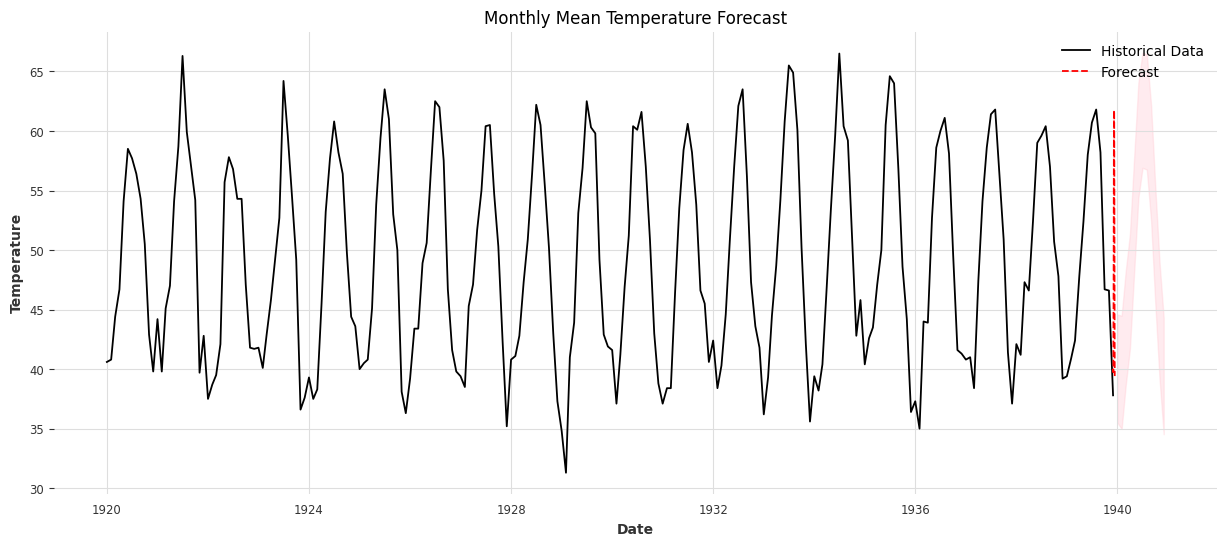

In [44]:
# Predicción con el modelo SARIMA
forecast_steps = 12
forecast_temp = sarima_temp_results.get_forecast(steps=forecast_steps)
forecast_index_temp = pd.date_range(temp_df.index[-1], periods=forecast_steps+1)[1:]
forecast_series_temp = pd.Series(forecast_temp.predicted_mean.values, index=forecast_index_temp)

# Intervalos de confianza al 95%
confidence_intervals_temp = forecast_temp.conf_int()

# Visualización de los resultados
plt.figure(figsize=(15, 6))
plt.plot(temp_df['Temperature'], label='Historical Data')
plt.plot(forecast_series_temp, color='red', label='Forecast', linestyle='--')
plt.fill_between(confidence_intervals_temp.index, 
                 confidence_intervals_temp.iloc[:, 0], 
                 confidence_intervals_temp.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Mean Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
print(prophet_temp_df)

            ds     y
0   1920-01-01  40.6
1   1920-02-01  40.8
2   1920-03-01  44.4
3   1920-04-01  46.7
4   1920-05-01  54.1
..         ...   ...
235 1939-08-01  61.8
236 1939-09-01  58.2
237 1939-10-01  46.7
238 1939-11-01  46.6
239 1939-12-01  37.8

[240 rows x 2 columns]


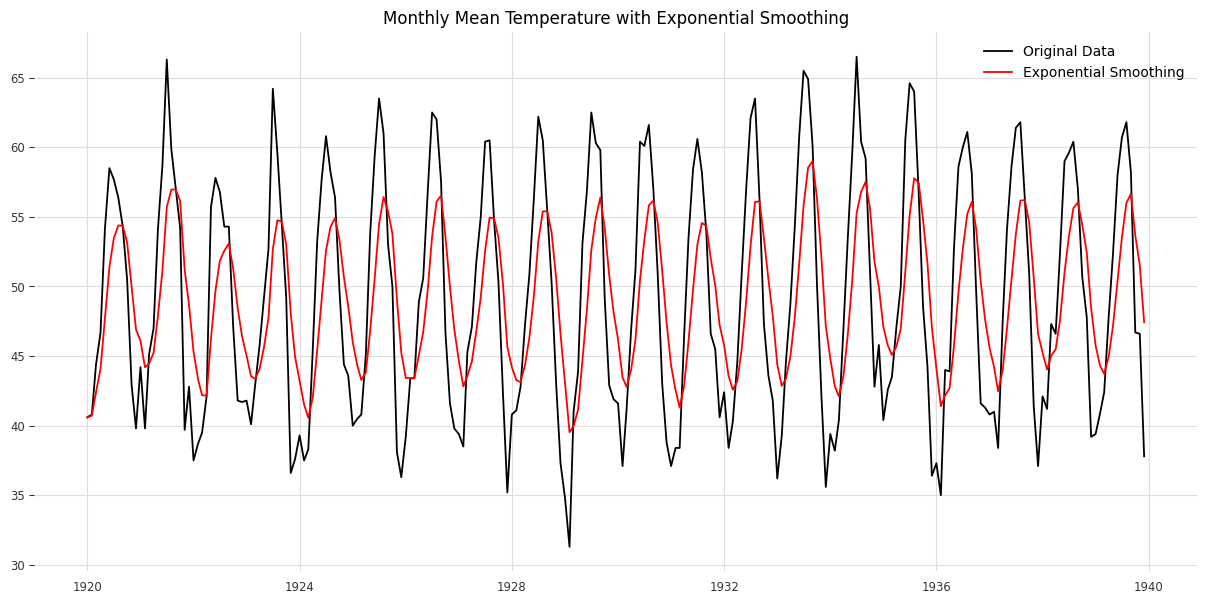

In [49]:
alpha = 0.3
prophet_temp_df['y_smooth'] = prophet_temp_df['y'].ewm(alpha=alpha).mean()

# Visualización
plt.figure(figsize=(15, 7))
plt.plot(prophet_temp_df['ds'], prophet_temp_df['y'], label='Original Data')
plt.plot(prophet_temp_df['ds'], prophet_temp_df['y_smooth'], color='red', label='Exponential Smoothing')
plt.title('Monthly Mean Temperature with Exponential Smoothing')
plt.legend()
plt.show()

21:42:43 - cmdstanpy - INFO - Chain [1] start processing
21:42:43 - cmdstanpy - INFO - Chain [1] done processing


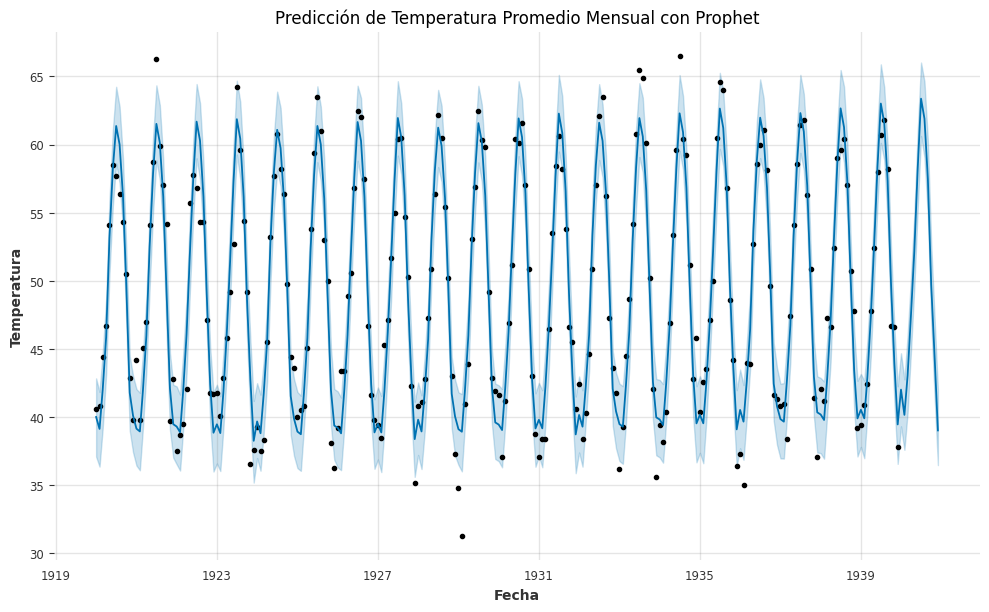

In [50]:
# Eliminando la columna de media móvil y reseteando el índice
prophet_temp_df = temp_df[['Temperature']].reset_index()

# Renombrando las columnas para el formato que Prophet requiere
prophet_temp_df.columns = ['ds', 'y']

# Creación y entrenamiento del modelo
prophet_temp_model = Prophet(yearly_seasonality=True)
prophet_temp_model.fit(prophet_temp_df)

# Crear dataframe futuro
future_temp = prophet_temp_model.make_future_dataframe(periods=12, freq='M')

# Predicciones
forecast_temp = prophet_temp_model.predict(future_temp)

# Visualizar las predicciones
fig_temp = prophet_temp_model.plot(forecast_temp)
plt.title("Predicción de Temperatura Promedio Mensual con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Temperatura")
plt.show()

Epoch 1/300
9/9 [==============================] - 3s 19ms/step - loss: 7310.6479
Epoch 2/300
9/9 [==============================] - 0s 17ms/step - loss: 2428.4153
Epoch 3/300
9/9 [==============================] - 0s 19ms/step - loss: 1681.0548
Epoch 4/300
9/9 [==============================] - 0s 20ms/step - loss: 1324.9122
Epoch 5/300
9/9 [==============================] - 0s 20ms/step - loss: 1136.4584
Epoch 6/300
9/9 [==============================] - 0s 20ms/step - loss: 907.1989
Epoch 7/300
9/9 [==============================] - 0s 20ms/step - loss: 448.2288
Epoch 8/300
9/9 [==============================] - 0s 20ms/step - loss: 69.9994
Epoch 9/300
9/9 [==============================] - 0s 20ms/step - loss: 56.5605
Epoch 10/300
9/9 [==============================] - 0s 21ms/step - loss: 51.8034
Epoch 11/300
9/9 [==============================] - 0s 19ms/step - loss: 50.7240
Epoch 12/300
9/9 [==============================] - 0s 20ms/step - loss: 51.5217
Epoch 13/300
9/9 [=======

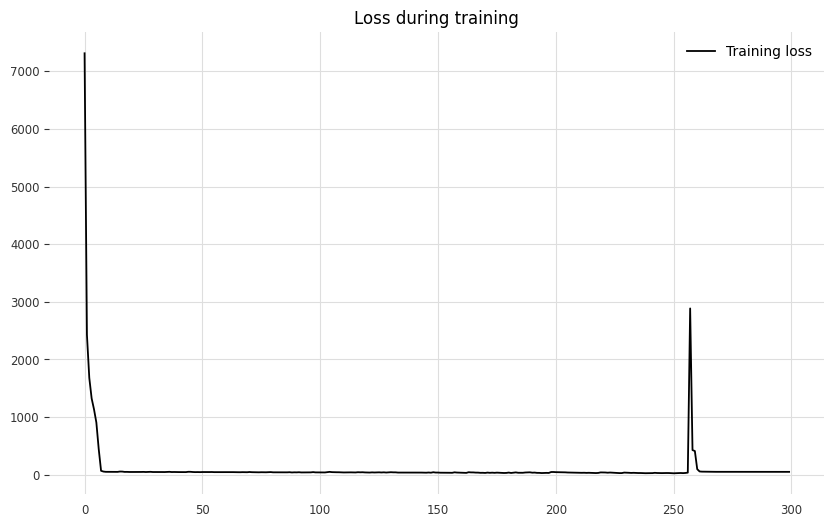

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Parámetros
time_steps = 30  # Ventana de tiempo
epochs = 300
batch_size = 32

# Creación del modelo
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Reshape para la red LSTM [samples, time_steps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Entrenamiento del modelo
history = model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Visualización del proceso de entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.title('Loss during training')
plt.show()

In [53]:
# Hacer predicciones
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

train_predictions = model.predict(X_train_reshaped)
test_predictions = model.predict(X_test_reshaped)

# Deshacer el escalado para visualizar las predicciones en la escala original
train_predictions = scaler.inverse_transform(train_predictions)
y_train_rescaled = scaler.inverse_transform([y_train])

test_predictions = scaler.inverse_transform(test_predictions)
y_test_rescaled = scaler.inverse_transform([y_test])

train_predictions = np.squeeze(train_predictions)
y_train_rescaled = np.squeeze(y_train_rescaled)

test_predictions = np.squeeze(test_predictions)
y_test_rescaled = np.squeeze(y_test_rescaled)

train_predictions.shape, y_train_rescaled.shape, test_predictions.shape, y_test_rescaled.shape

2/2 [==============================] - 0s 5ms/step


((262,), (262,), (43,), (43,))

2/2 [==============================] - 0s 4ms/step


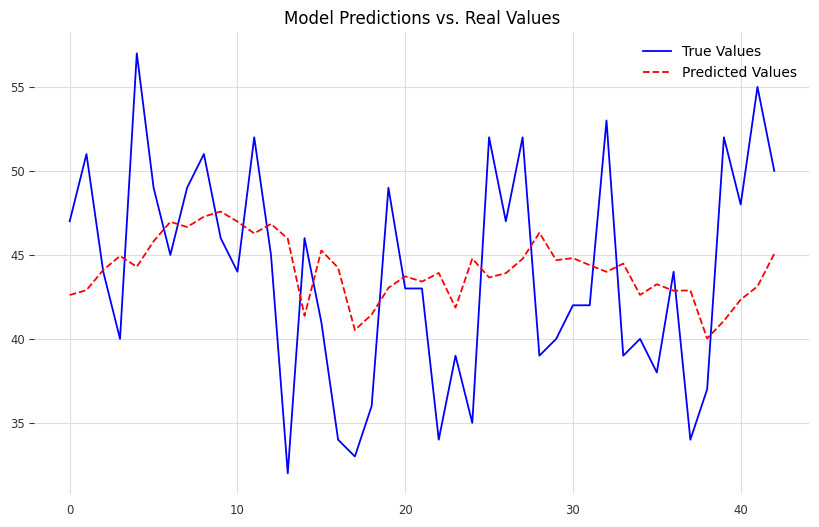

In [56]:
# Reshape X_test y obtener predicciones
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test_reshaped)

# Visualización de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', linestyle='--')
plt.title('Model Predictions vs. Real Values')
plt.legend()
plt.show()

### shampoo.csv

In [69]:
# Cargando el conjunto de datos
shampoo_df = pd.read_csv('shampoo.csv', parse_dates=['Month'], index_col='Month')

# Mostrando las primeras filas del conjunto de datos
shampoo_df.head()

/tmp/ipykernel_12629/2221447437.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shampoo_df = pd.read_csv('shampoo.csv', parse_dates=['Month'], index_col='Month')


,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


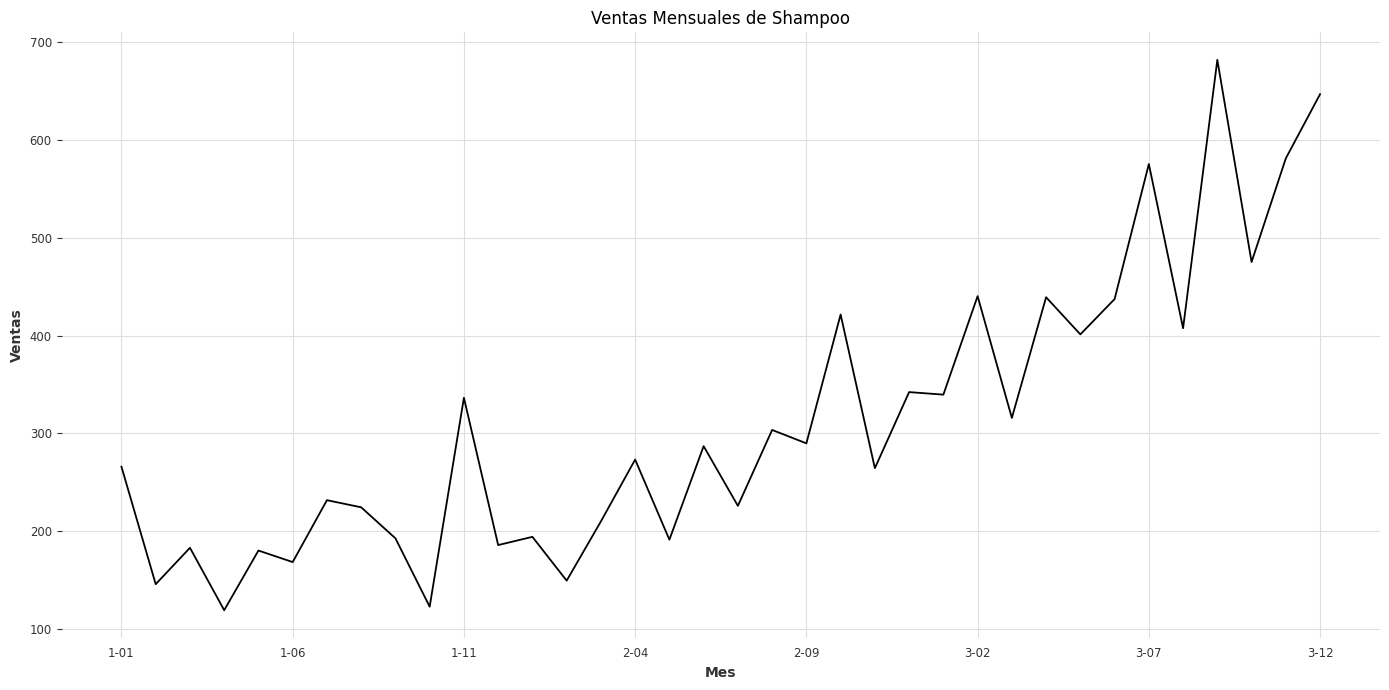

In [70]:
# Visualización de la serie de tiempo
plt.figure(figsize=(14, 7))
shampoo_df['Sales'].plot(title='Ventas Mensuales de Shampoo', grid=True)
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.tight_layout()
plt.show()

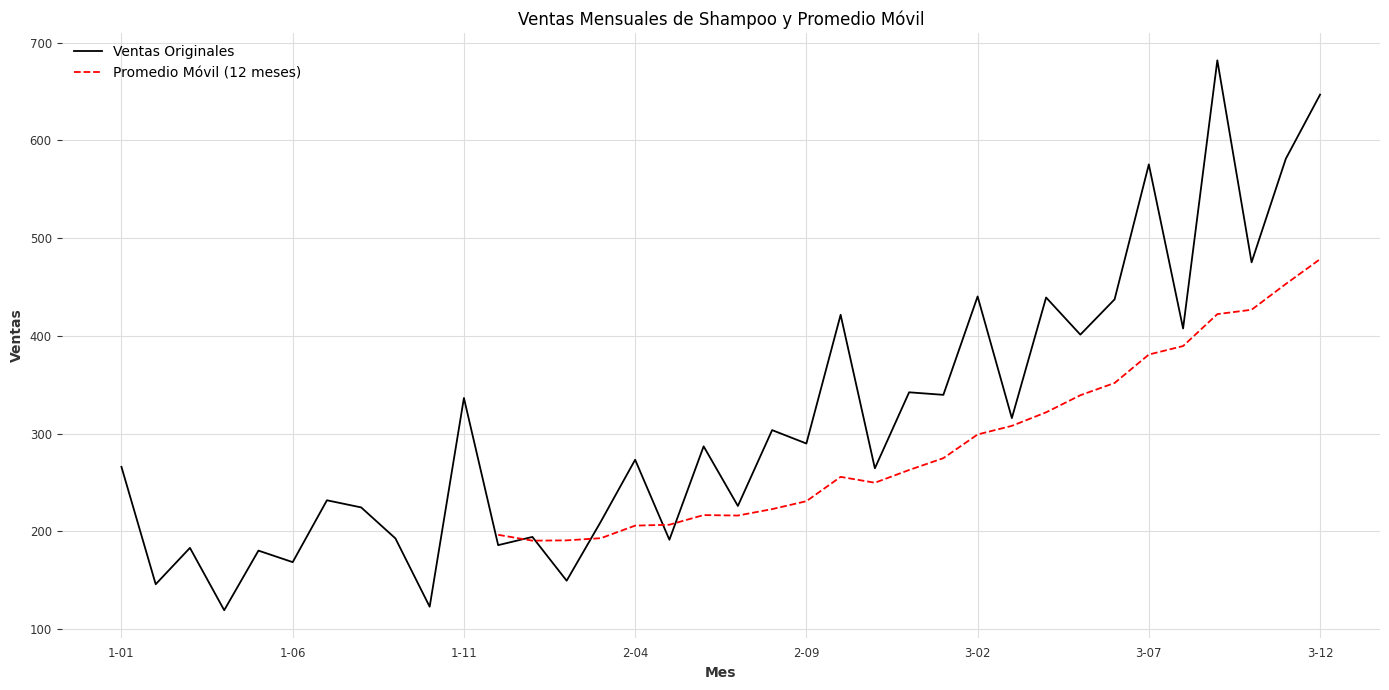

In [71]:
# Calculando el promedio móvil con una ventana de 12 meses
shampoo_df['Moving_Avg'] = shampoo_df['Sales'].rolling(window=12).mean()

# Visualización de la serie original y el promedio móvil
plt.figure(figsize=(14, 7))
shampoo_df['Sales'].plot(label='Ventas Originales', grid=True)
shampoo_df['Moving_Avg'].plot(label='Promedio Móvil (12 meses)', linestyle='--', color='red')
plt.title('Ventas Mensuales de Shampoo y Promedio Móvil')
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.legend()
plt.tight_layout()
plt.show()

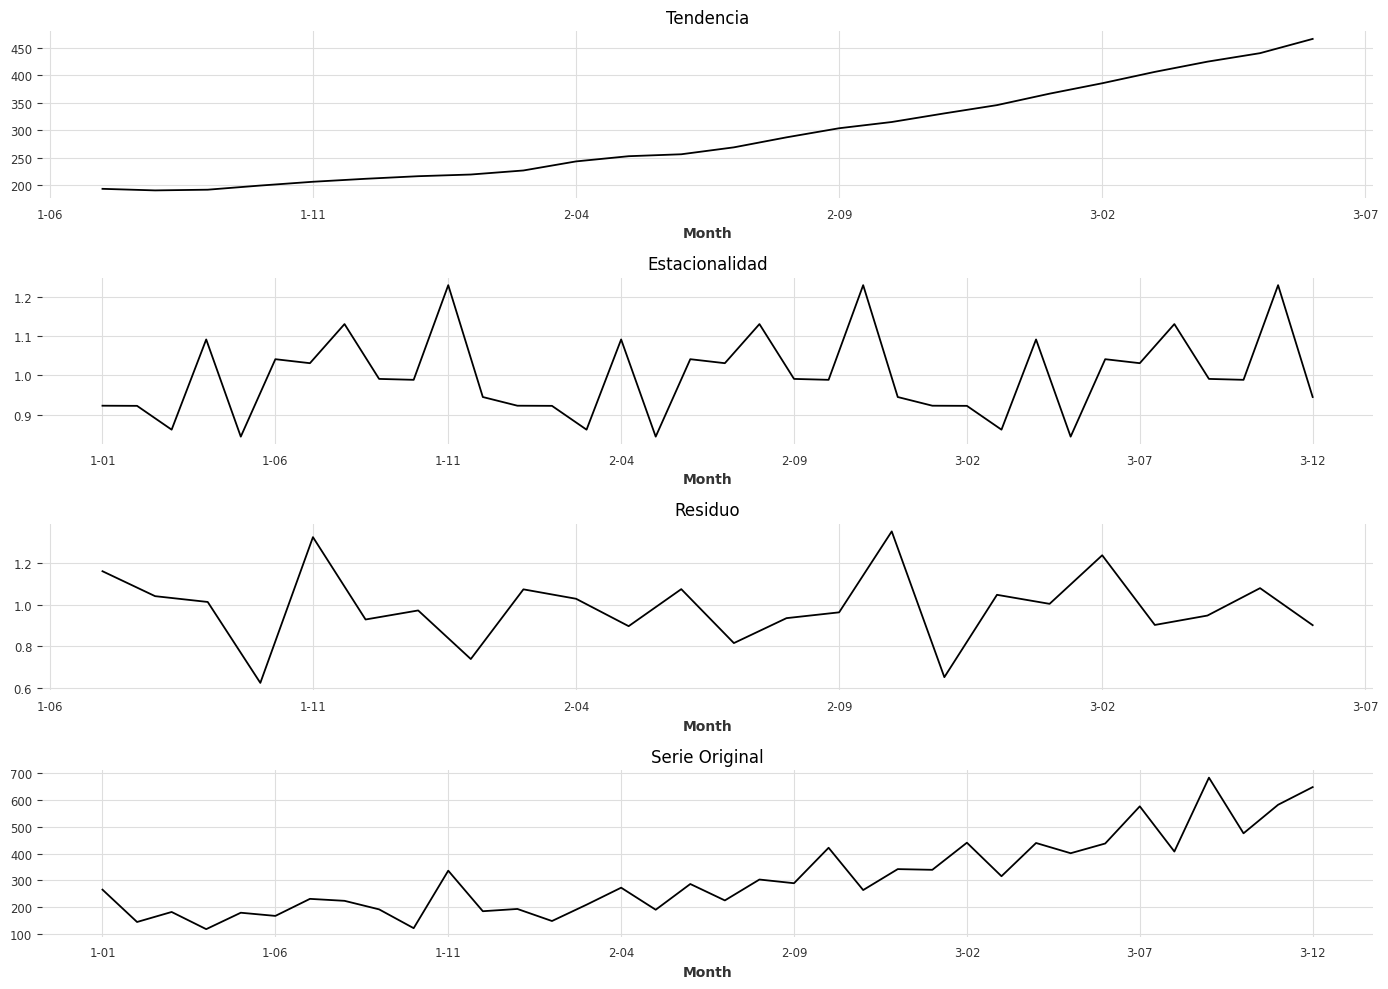

In [73]:
# Descomposición de la serie de tiempo con un período de 12 meses
result = seasonal_decompose(shampoo_df['Sales'], model='multiplicative', period=12)

# Visualización de la descomposición
plt.figure(figsize=(14, 10))

# Tendencia
plt.subplot(4, 1, 1)
result.trend.plot(title='Tendencia')
plt.grid(True)

# Estacionalidad
plt.subplot(4, 1, 2)
result.seasonal.plot(title='Estacionalidad')
plt.grid(True)

# Residuo
plt.subplot(4, 1, 3)
result.resid.plot(title='Residuo')
plt.grid(True)

# Serie original
plt.subplot(4, 1, 4)
shampoo_df['Sales'].plot(title='Serie Original')
plt.grid(True)

plt.tight_layout()
plt.show()

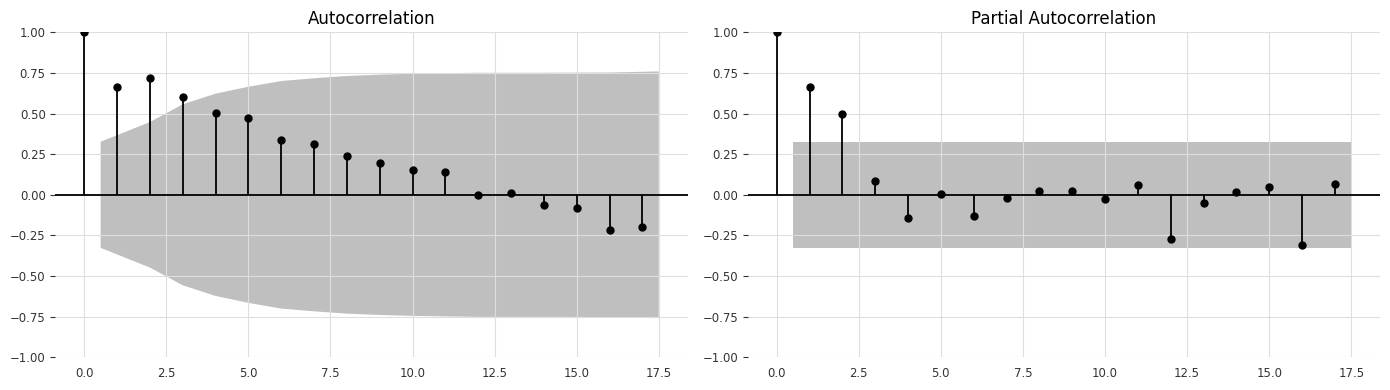

In [74]:
# Gráficos ACF y PACF con un número adecuado de retrasos
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(shampoo_df['Sales'], lags=17, ax=ax[0])
plot_pacf(shampoo_df['Sales'], lags=17, ax=ax[1], method='ywm')
plt.tight_layout()
plt.show()

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parámetros iniciales
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(shampoo_df['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit(disp=False)

# Resumen del modelo
sarima_result.summary()

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -138.544
Date:                            Sat, 02 Sep 2023   AIC                            287.088
Time:                                    23:09:31   BIC                            292.766
Sample:                                         0   HQIC                           288.516
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5912      0.505     -1.171      0.242      -1.581       0.399
ma.L1         -0.5243      0.378     -1.388      0.165      -1.265       0.216
ar.S.L12      -0.9982      0.065    -15.411      0.000      -1.125      -0.871
ma.S.L12       0.9377      1.139      0.823      0.410      -1.295       3.171
sigma2      5611.2460      0.000   2.55e+07      0.000    5611.246    5611.246
===================================================================================
Ljung-Box (L1) (Q):                   2.47   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.12   Prob(JB):                         0.81
Heteroskedasticity (H):               1.96   Skew:                             0.28
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.06e+23. Standard errors may be unstable.
"""

/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/unclepete/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


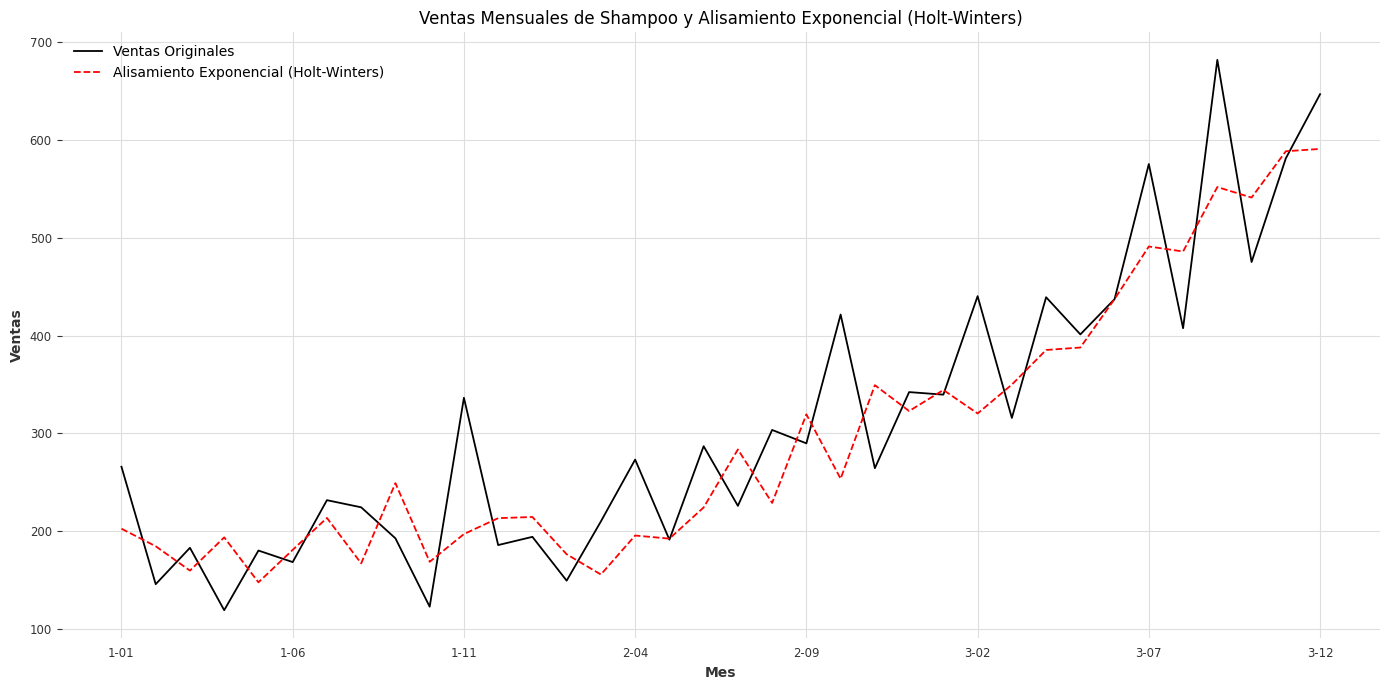

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aplicando el método de Holt-Winters
hw_model = ExponentialSmoothing(shampoo_df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()

# Predicciones
shampoo_df['Holt_Winters'] = hw_result.fittedvalues

# Visualización
plt.figure(figsize=(14, 7))
shampoo_df['Sales'].plot(label='Ventas Originales', grid=True)
shampoo_df['Holt_Winters'].plot(label='Alisamiento Exponencial (Holt-Winters)', linestyle='--', color='red')
plt.title('Ventas Mensuales de Shampoo y Alisamiento Exponencial (Holt-Winters)')
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.legend()
plt.tight_layout()
plt.show()

23:12:28 - cmdstanpy - INFO - Chain [1] start processing
23:12:28 - cmdstanpy - INFO - Chain [1] done processing


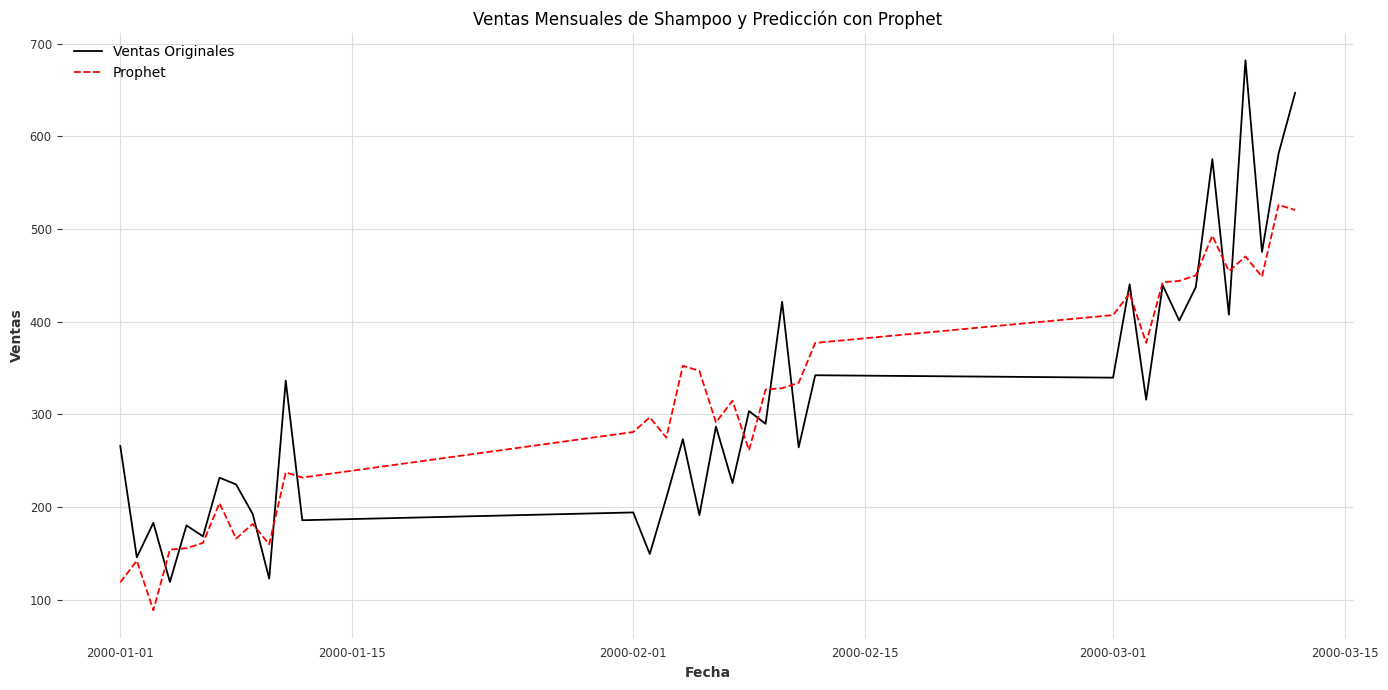

In [78]:
# Reformateando las fechas correctamente
prophet_df['ds'] = '2000-' + prophet_df['ds'].astype(str)
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Ajustando el modelo Prophet nuevamente
prophet_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=12, fourier_order=5)
prophet_result = prophet_model.fit(prophet_df)

# Predicciones
future = prophet_model.make_future_dataframe(periods=0)
forecast = prophet_model.predict(future)

# Visualización
plt.figure(figsize=(14, 7))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Ventas Originales')
plt.plot(forecast['ds'], forecast['yhat'], linestyle='--', color='red', label='Prophet')
plt.title('Ventas Mensuales de Shampoo y Predicción con Prophet')
plt.ylabel('Ventas')
plt.xlabel('Fecha')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

In [80]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Convertir la serie de tiempo en un array
data = shampoo_df['Sales'].values
data = data.reshape(-1, 1)

# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Función para crear un conjunto de datos de entrenamiento
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Crear conjuntos de entrenamiento y prueba
train_size = int(len(data_normalized) * 0.67)
test_size = len(data_normalized) - train_size
train, test = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape para el modelo LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [81]:
# Crear y ajustar el modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2023-09-02 23:16:16.104575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-02 23:16:16.108713: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-02 23:16:16.113207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 - 4s - loss: 0.0318 - 4s/epoch - 211ms/step
Epoch 2/100
20/20 - 0s - loss: 0.0255 - 84ms/epoch - 4ms/step
Epoch 3/100
20/20 - 0s - loss: 0.0212 - 110ms/epoch - 6ms/step
Epoch 4/100
20/20 - 0s - loss: 0.0184 - 108ms/epoch - 5ms/step
Epoch 5/100
20/20 - 0s - loss: 0.0168 - 104ms/epoch - 5ms/step
Epoch 6/100
20/20 - 0s - loss: 0.0161 - 139ms/epoch - 7ms/step
Epoch 7/100
20/20 - 0s - loss: 0.0156 - 118ms/epoch - 6ms/step
Epoch 8/100
20/20 - 0s - loss: 0.0155 - 96ms/epoch - 5ms/step
Epoch 9/100
20/20 - 0s - loss: 0.0152 - 101ms/epoch - 5ms/step
Epoch 10/100
20/20 - 0s - loss: 0.0152 - 86ms/epoch - 4ms/step
Epoch 11/100
20/20 - 0s - loss: 0.0152 - 87ms/epoch - 4ms/step
Epoch 12/100
20/20 - 0s - loss: 0.0151 - 70ms/epoch - 3ms/step
Epoch 13/100
20/20 - 0s - loss: 0.0151 - 97ms/epoch - 5ms/step
Epoch 14/100
20/20 - 0s - loss: 0.0150 - 92ms/epoch - 5ms/step
Epoch 15/100
20/20 - 0s - loss: 0.0150 - 85ms/epoch - 4ms/step
Epoch 16/100
20/20 - 0s - loss: 0.0150 - 77ms/epoch - 4ms/step
Epoch 1

In [82]:
# Hacer predicciones
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invertir las predicciones para obtener valores originales y no normalizados
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2023-09-02 23:16:39.928079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-09-02 23:16:39.929859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-09-02 23:16:39.931290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 50ms/step


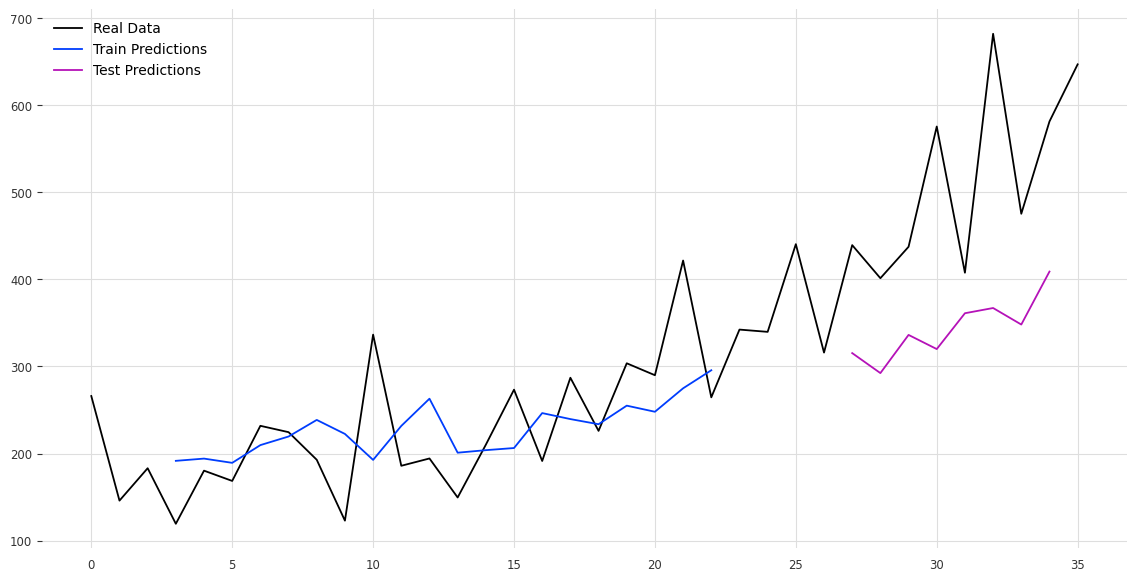

In [83]:
import matplotlib.pyplot as plt

# Desplazar las predicciones del entrenamiento para trazar
trainPredictPlot = np.empty_like(data_normalized)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Desplazar las predicciones de la prueba para trazar
testPredictPlot = np.empty_like(data_normalized)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_normalized)-1, :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(14, 7))
plt.plot(scaler.inverse_transform(data_normalized), label='Real Data')
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.legend()
plt.show()